In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import clear_border
import re

In [ ]:
print(f"CV: {cv2.__version__}")
print(f"tess: {pytesseract.__version__}")

Leitura de Imagem

In [ ]:
img = cv2.imread("imagens/trecho_livro.png")

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(rgb);

In [ ]:
config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(rgb, lang="por", config=config_tesseract)

print(texto)

## Agora com uma placa

In [ ]:
imgPath = "imagens/placa_carro1.png"

img = cv2.imread(imgPath)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(imgGray, lang="por", config=config_tesseract)
print(texto)

In [ ]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

### Limiarização Simples

In [ ]:
threshold = 140

valor, thresh = cv2.threshold(imgGray, threshold, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(thresh, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh, lang="por", config=config_tesseract)
print(f"Texto: {texto}")



### Limirização Adaptativa

In [ ]:
thresh_adapt = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

In [ ]:
thresh_adapt = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

In [ ]:
config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh_adapt, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
imgGray

### Limiarização de Otsu

In [ ]:
valor, thresh_otsu = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(thresh_otsu, cmap='gray');
print(valor)

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(thresh_otsu, lang="por", config=config_tesseract)
print(f"Texto: {texto}")



cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.axis('off')
plt.imshow(thresh_adapt, cmap='gray');

## Transformações Morfológicas - Erosão e Dilatação

In [ ]:
#erosão
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))

erode = cv2.erode(src=thresh_otsu, kernel=k)

plt.axis('off')
plt.imshow(erode, cmap='gray');


config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(erode, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
#dilatação
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))

dilate = cv2.dilate(src=thresh_otsu, kernel=k)

plt.axis('off')
plt.imshow(dilate, cmap='gray');


config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(dilate, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

### Abertura & Fechamento

In [ ]:
# abertura
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
opening = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(opening, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(opening, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
# fechamento
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
closing = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(closing, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(closing, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

## Outras Trasnformações

In [ ]:
# gradiente morfológico
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
gradiente = cv2.morphologyEx(thresh_otsu, cv2.MORPH_GRADIENT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(gradiente, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(gradiente, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
# cartola
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_TOPHAT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
# blackhat
k = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
blackhat = cv2.morphologyEx(thresh_otsu, cv2.MORPH_BLACKHAT, k)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(blackhat, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(blackhat, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_TOPHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")


In [ ]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(imgGray, cv2.MORPH_TOPHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(thresh_otsu, cv2.MORPH_BLACKHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
# usando escala de cinza
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(imgGray, cv2.MORPH_BLACKHAT, kernel_placa_brasil)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cartola, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(cartola, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

## Bordas e Contornos

In [ ]:
bordas = cv2.Canny(imgGray, 100, 200)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(bordas, cmap='gray');

In [ ]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(contornos)

In [ ]:
for contorno in contornos:
    epsilon = .02*cv2.arcLength(contorno, True)

    aprox = cv2.approxPolyDP(contorno, epsilon, True)
    
    if (cv2.isContourConvex(aprox)) & (len(aprox) == 4):
        local = aprox
        break
    
local

In [ ]:
x, y, w, h = cv2.boundingRect(local)

print(x)
print(y)
print(w)
print(h)

In [ ]:
placa = imgGray[y:y+h, x:x+w]

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(placa, cmap='gray')

In [ ]:
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
valor, thresh_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erode = cv2.erode(thresh_otsu, kernel_placa_brasil)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(erode, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(erode, lang="por", config=config_tesseract)
print(f"Texto: {texto}")

In [ ]:
import re

In [ ]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)

print(texto_extraido.group(0))

## Aula 5 - Automatização

In [15]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import clear_border
import re

img = cv2.imread("imagens/20150614_073635.jpg")

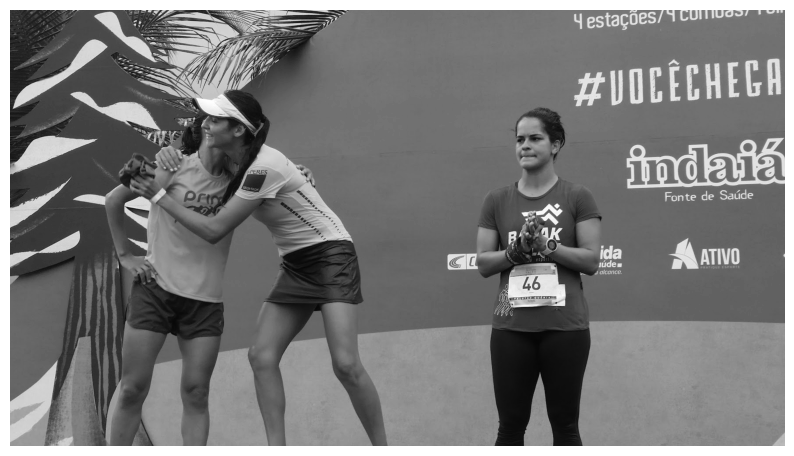

In [16]:
# img = cv2.imread("imagens/4ab1f2dd-712a-4fda-948e-95b9a73914d9.jpeg")
# img = cv2.imread("imagens/20150614_073635.jpg")
# img = cv2.imread("imagens/placa_carro3.jpg")

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,6))
plt.axis("off")
plt.imshow(imgGray, cmap=('gray'));

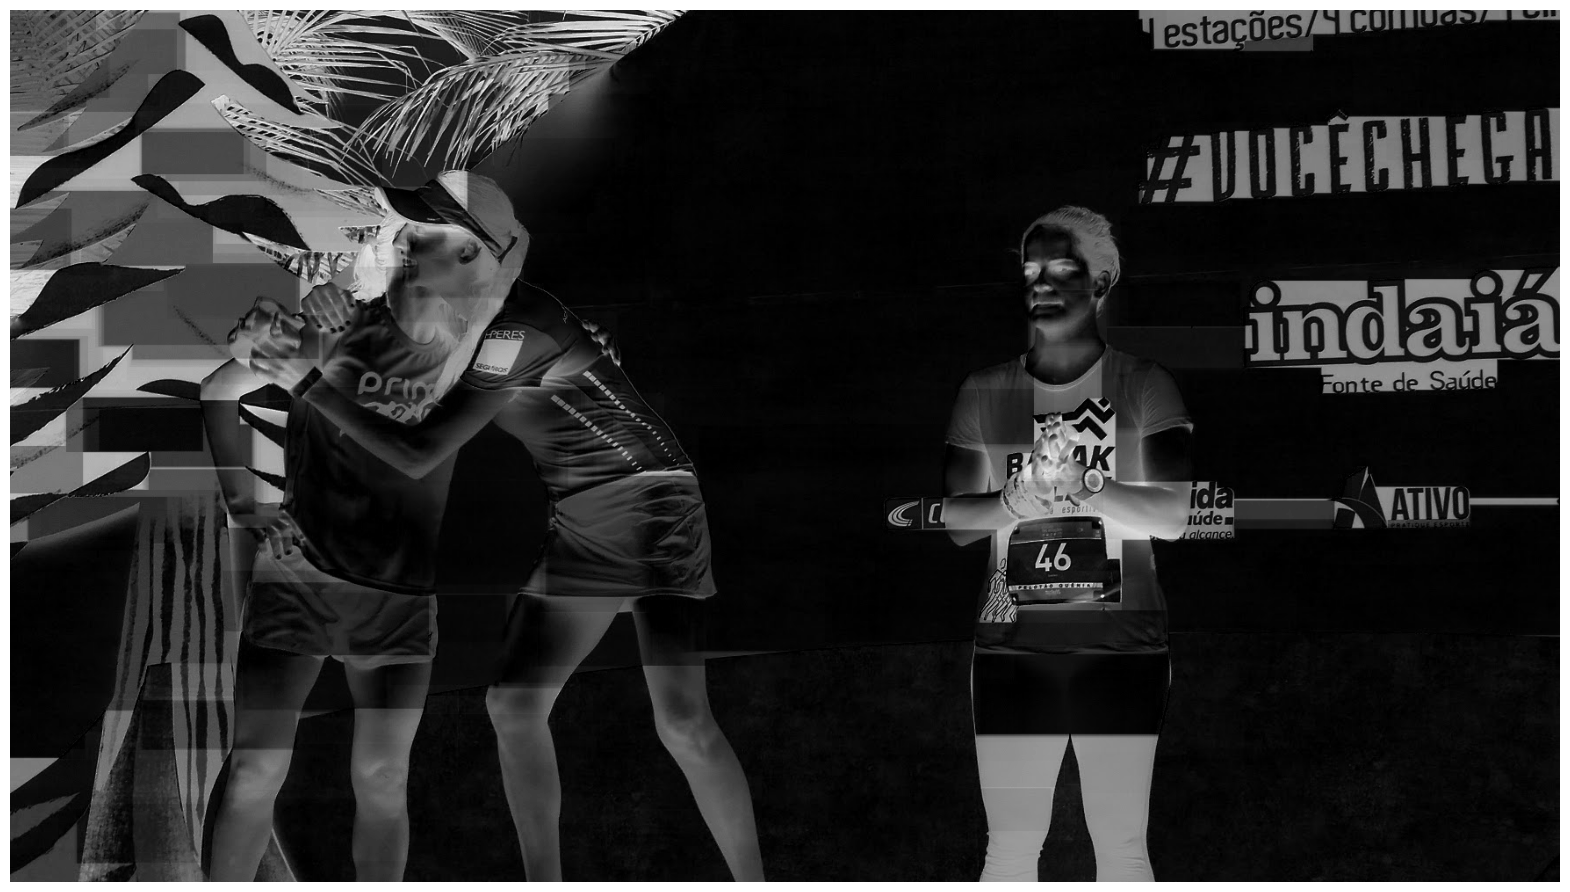

In [17]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (114,47))
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (22,15))
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
blackhat = cv2.morphologyEx(imgGray, cv2.MORPH_BLACKHAT, k)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(blackhat, cmap=('gray'));

### Efeito de Sobel

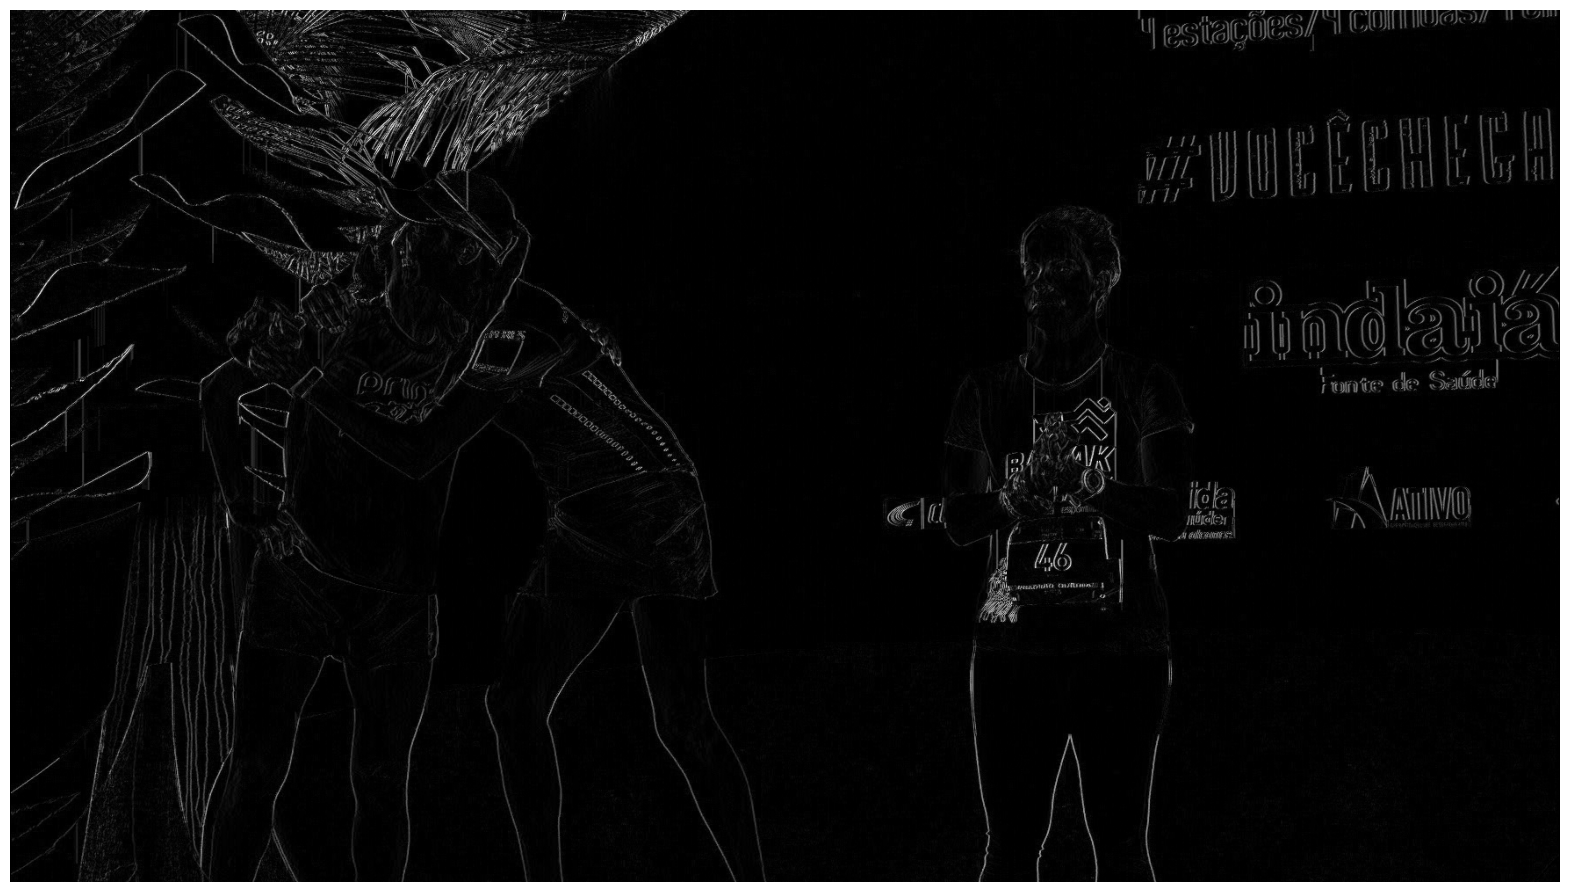

In [18]:
sobel_x = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(sobel_x, cmap=('gray'));

### Gaussian - Efeito Blur

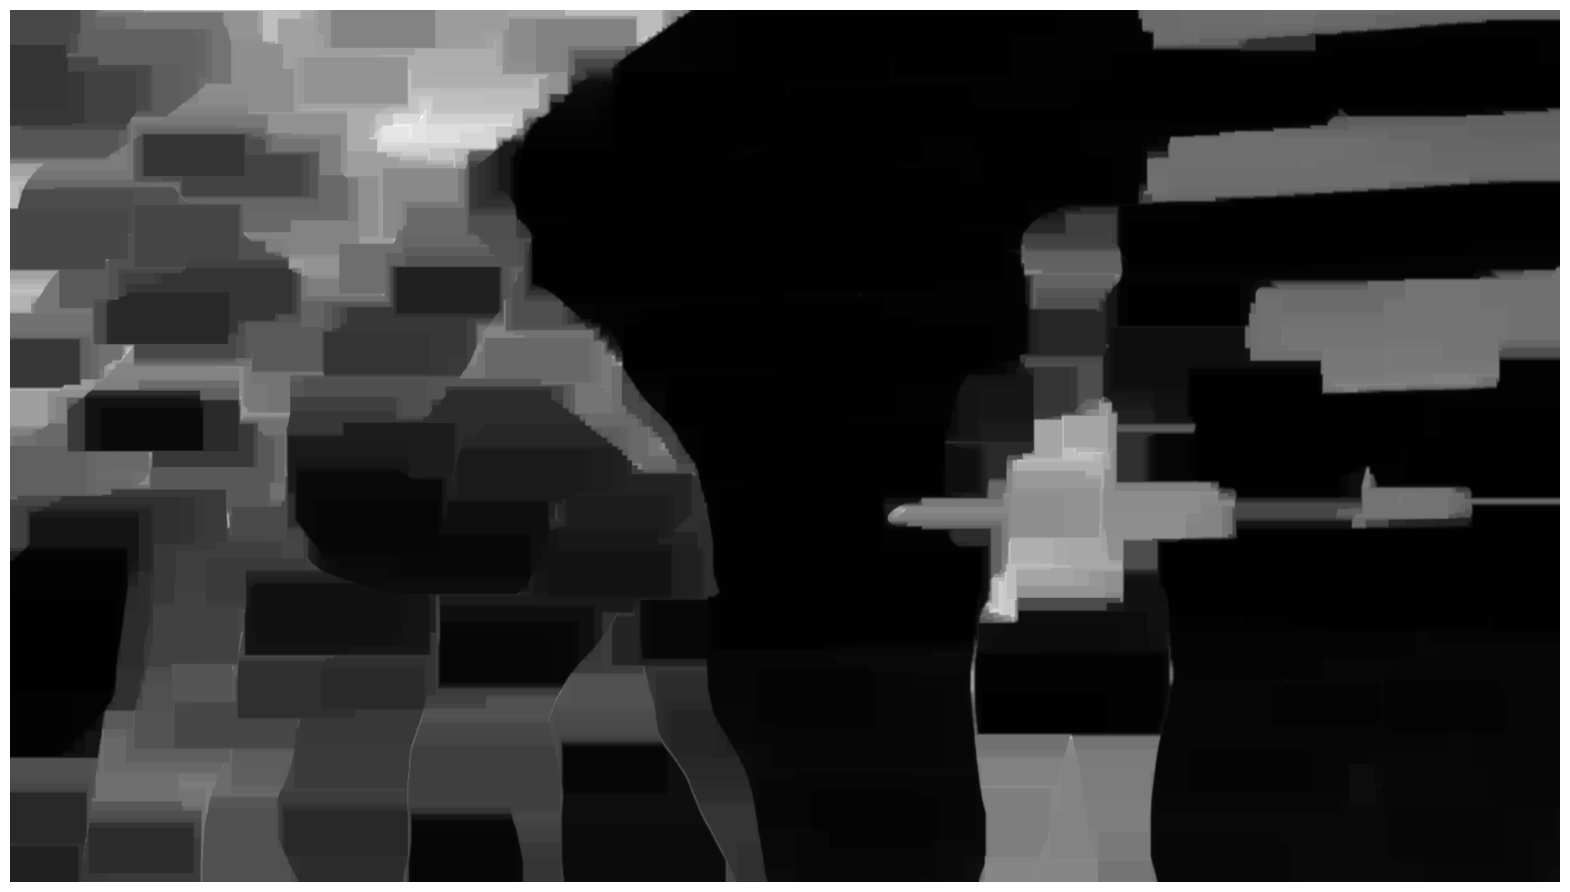

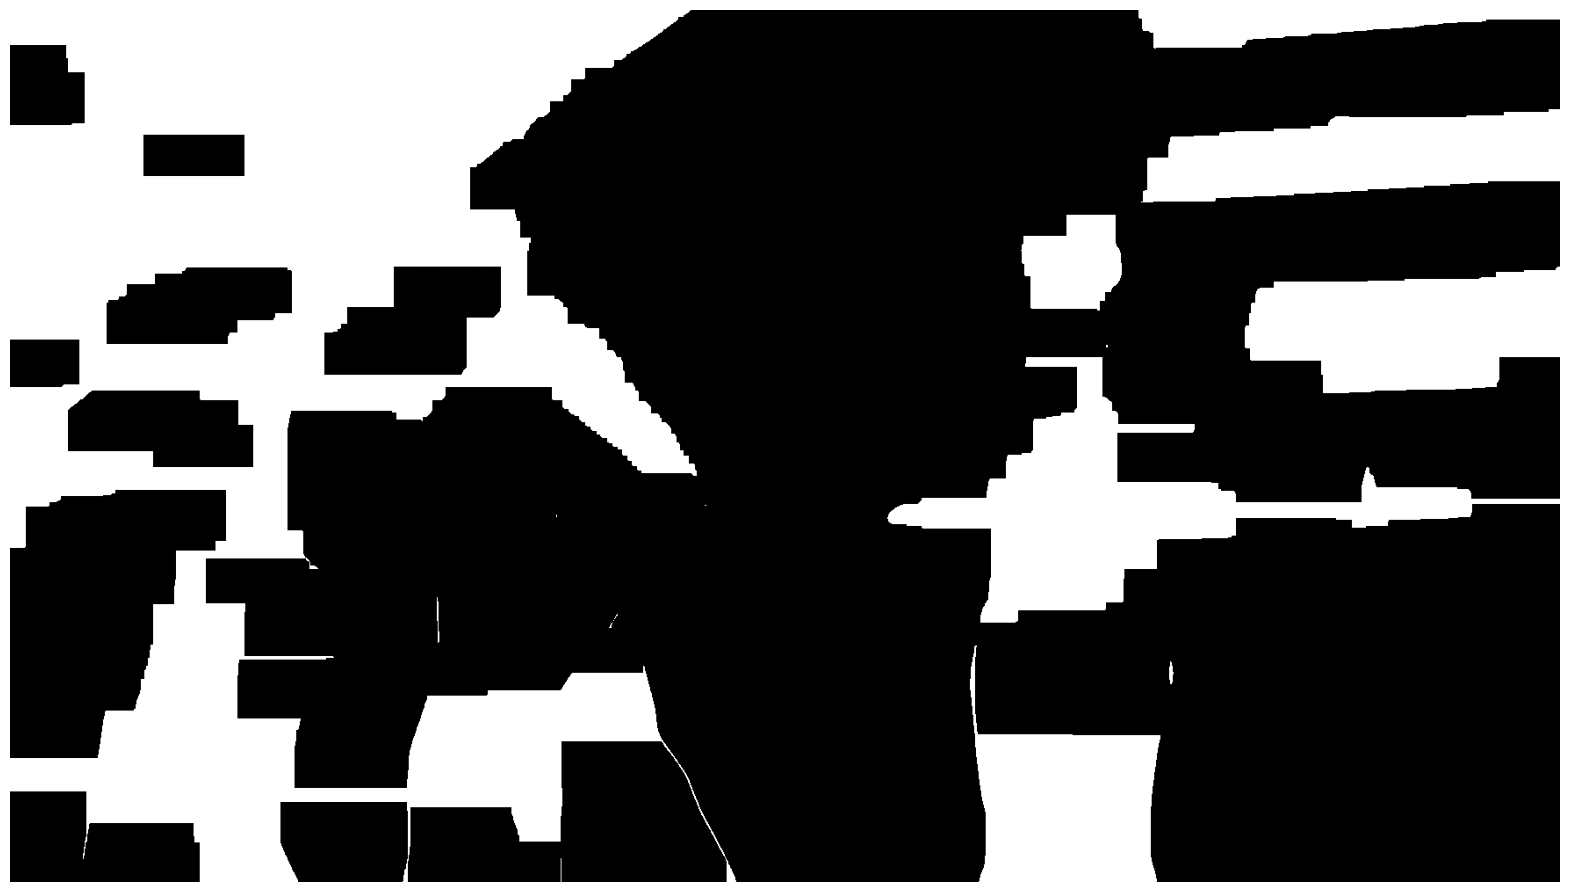

In [19]:
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
k = cv2.getStructuringElement(cv2.MORPH_RECT, (114,47))
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (22,15))

sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, k)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(sobel_x, cmap=('gray'));

valor, thresh = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(thresh, cmap=('gray'));

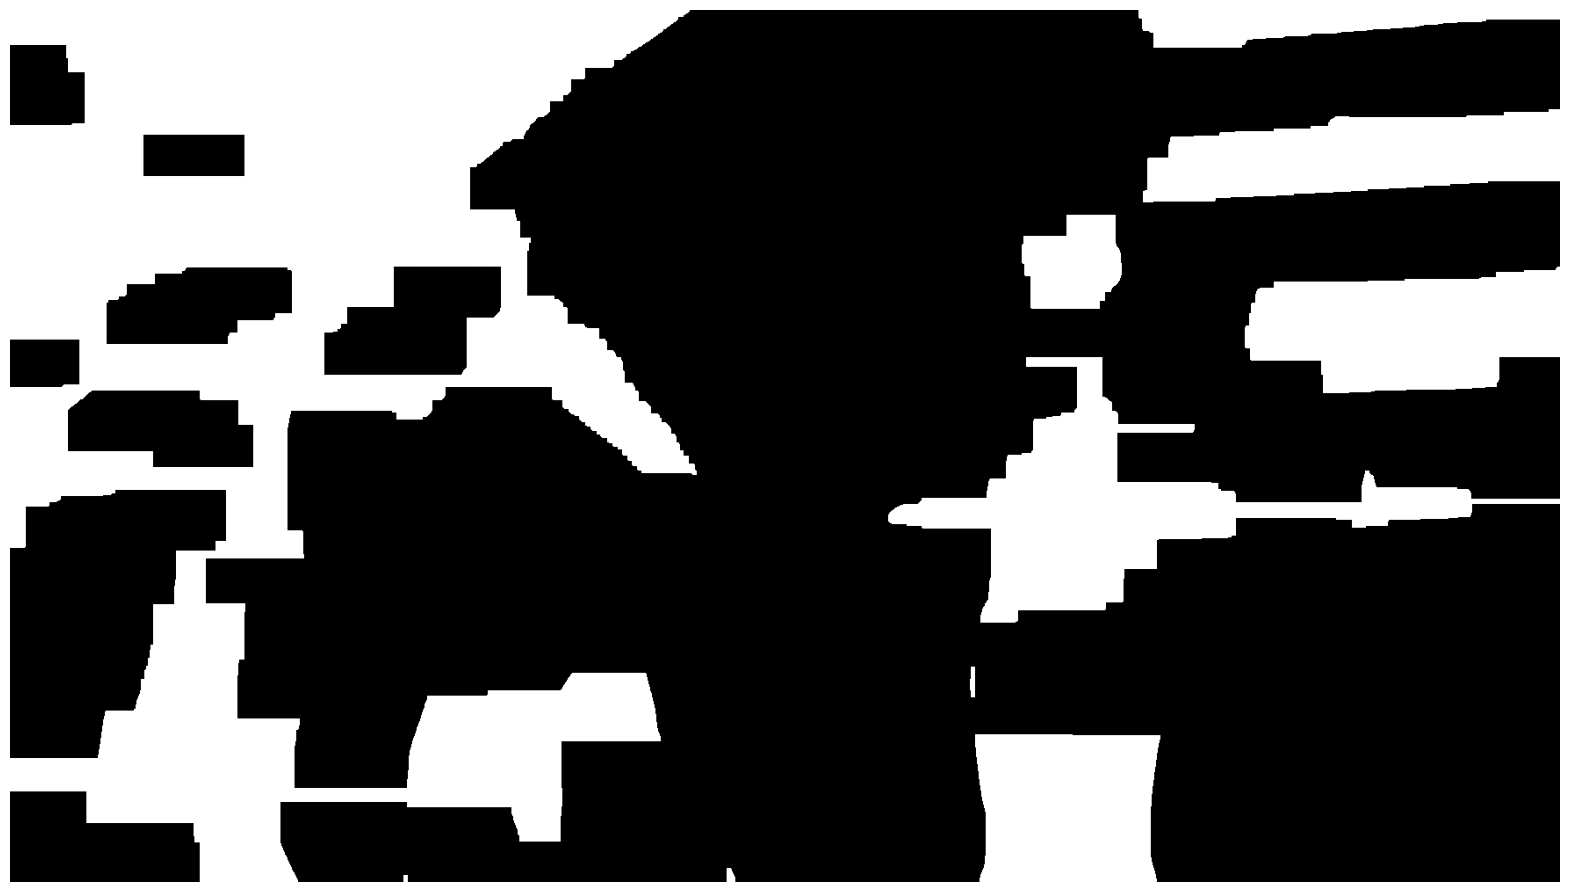

In [20]:
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

thresh = cv2.erode(thresh, k2, iterations=2)

thresh = cv2.dilate(thresh, k2, iterations=2)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(thresh, cmap=('gray'));

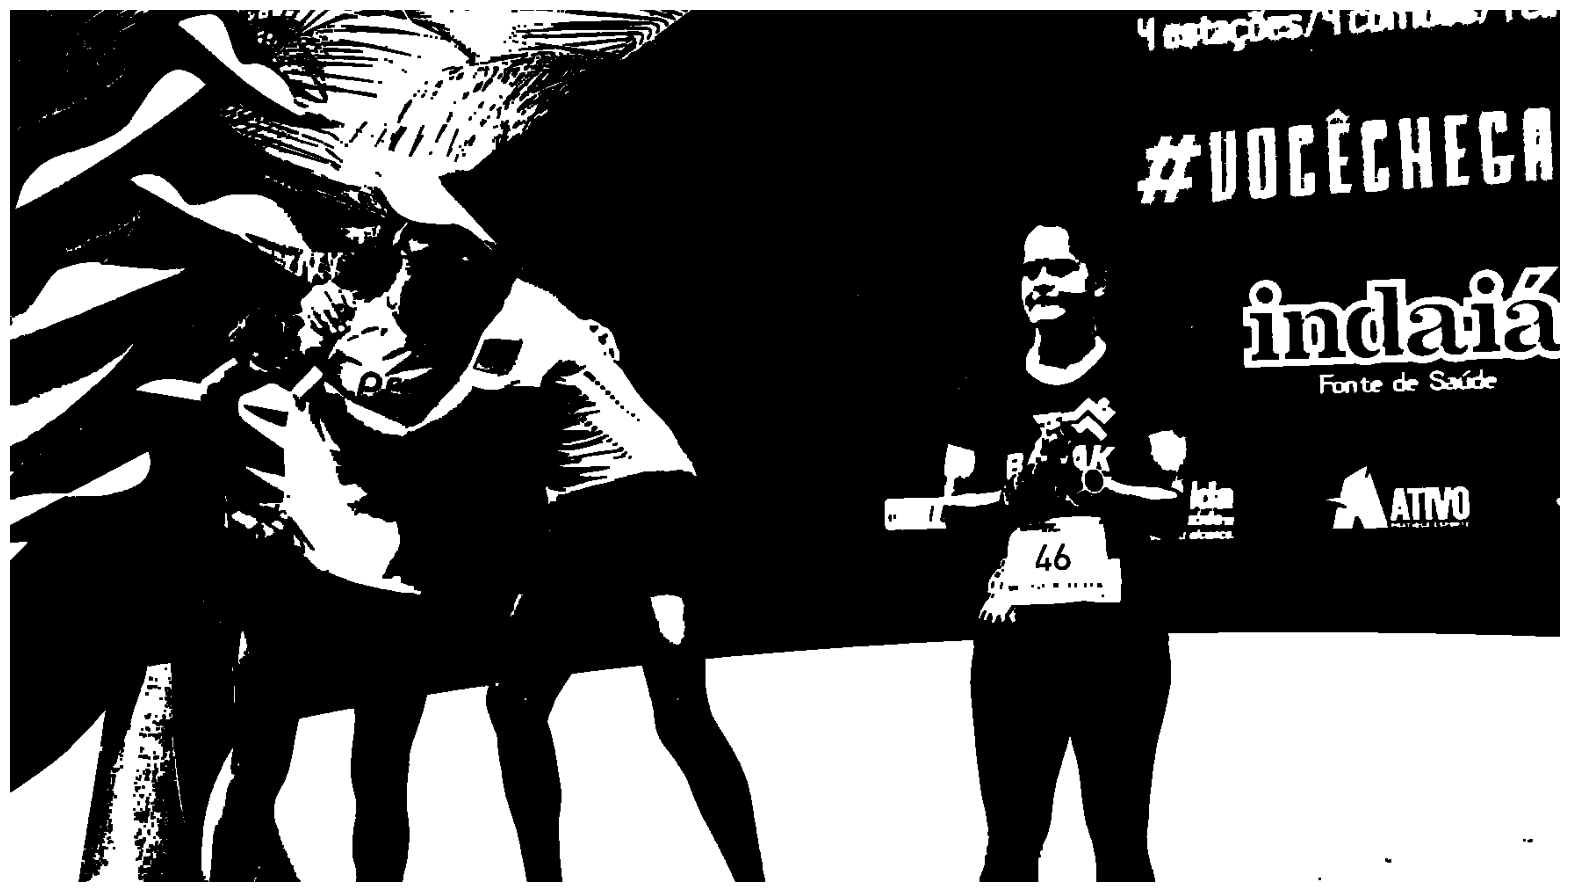

In [21]:
closing = cv2.morphologyEx(imgGray, cv2.MORPH_CLOSE, k2)
valor, skin = cv2.threshold(closing, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(skin, cmap=('gray'));

### Bitwise_and

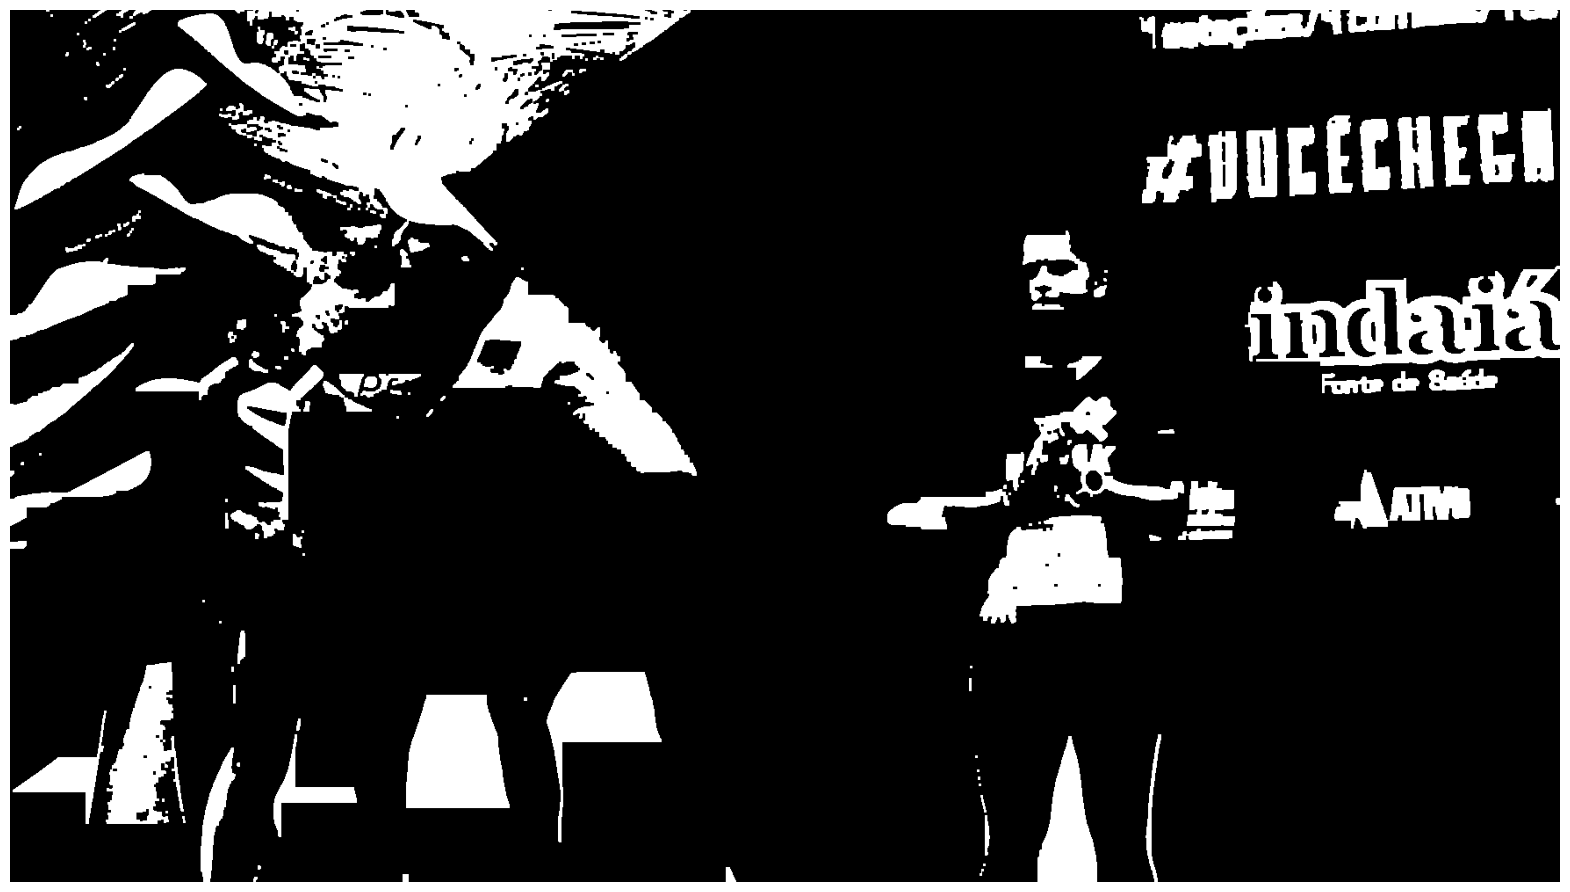

In [22]:
thresh = cv2.bitwise_and(thresh, thresh, mask = skin)
thresh = cv2.dilate(thresh, k2, iterations=2)
thresh = cv2.erode(thresh, k2)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(thresh, cmap=('gray'));

## Scikit Image

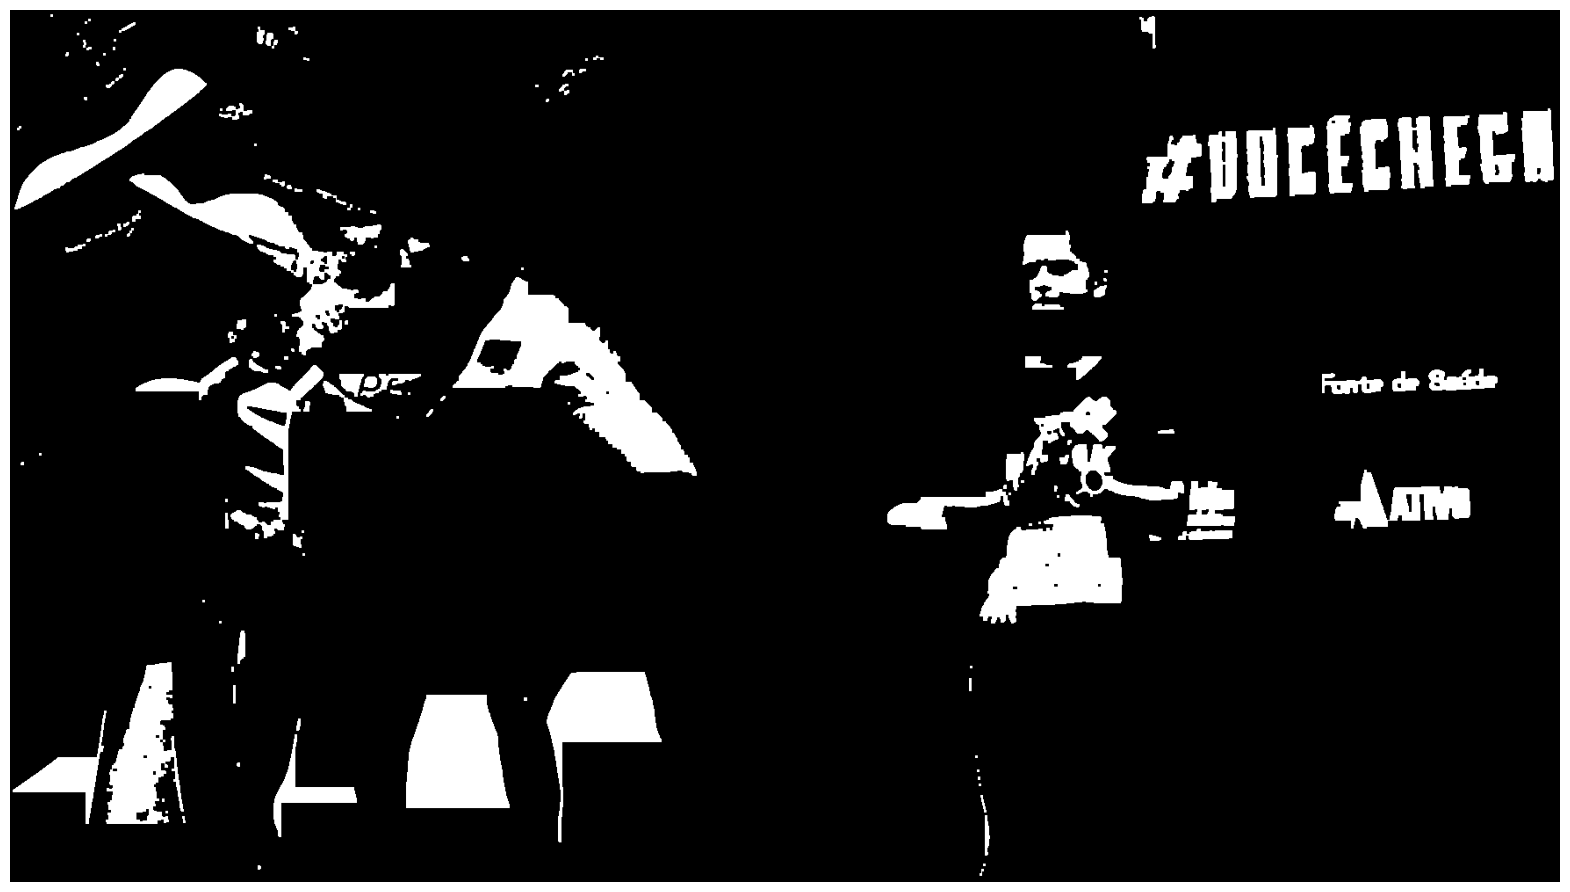

In [23]:
thresh = clear_border(thresh)

plt.figure(figsize=(20,12))
plt.axis("off")
plt.imshow(thresh, cmap=('gray'));

In [24]:
contours, hierarquia = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse=True)[:10]
contours

[array([[[576, 305]],
 
        [[575, 306]],
 
        [[575, 307]],
 
        [[573, 309]],
 
        [[573, 310]],
 
        [[571, 312]],
 
        [[571, 314]],
 
        [[570, 315]],
 
        [[570, 318]],
 
        [[569, 319]],
 
        [[569, 321]],
 
        [[568, 322]],
 
        [[568, 323]],
 
        [[566, 325]],
 
        [[566, 326]],
 
        [[562, 330]],
 
        [[562, 334]],
 
        [[561, 335]],
 
        [[561, 337]],
 
        [[560, 338]],
 
        [[560, 339]],
 
        [[559, 340]],
 
        [[559, 341]],
 
        [[551, 349]],
 
        [[551, 350]],
 
        [[549, 352]],
 
        [[549, 353]],
 
        [[543, 359]],
 
        [[543, 360]],
 
        [[539, 364]],
 
        [[539, 365]],
 
        [[537, 367]],
 
        [[537, 368]],
 
        [[536, 369]],
 
        [[536, 370]],
 
        [[535, 371]],
 
        [[535, 372]],
 
        [[534, 373]],
 
        [[534, 375]],
 
        [[533, 376]],
 
        [[533, 377]],
 
        [[532, 3

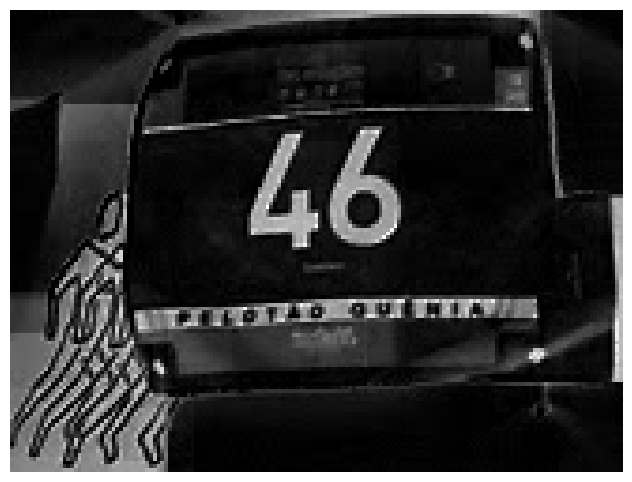

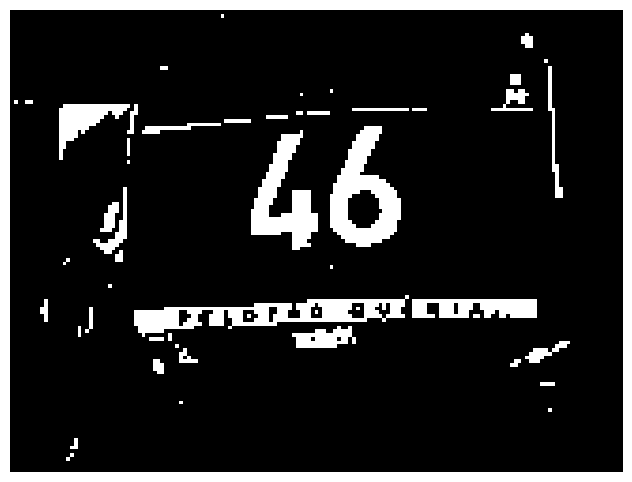

In [31]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    proportion = float(w)/h
    
    if proportion >=1.3 and proportion <= 1.33:
        placa = imgGray[y:y+h, x:x+w]
        
        # k = cv2.getStructuringElement(cv2.MORPH_RECT, (114,47))
        k = cv2.getStructuringElement(cv2.MORPH_RECT, (22,15))
        # k = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
        placa = cv2.morphologyEx(placa, cv2.MORPH_BLACKHAT, k)
        valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        regiao_interesse = clear_border(regiao_interesse)
        
        plt.figure(figsize=(10,6))
        plt.axis("off")
        plt.imshow(placa, cmap=('gray'));
        
        plt.figure(figsize=(10,6))
        plt.axis("off")
        plt.imshow(regiao_interesse, cmap=('gray'));

In [32]:
# stringStd = '\d{3}-\d{1}'
# stringStd = '\w{3}\d{1}\w{1}\d{2}'
config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(regiao_interesse, lang="por", config=config_tesseract)
print(texto)
# textoMatch = re.search(stringStd, texto)
# print(textoMatch.group(0))

TE

